In [ ]:
import numpy as np                #for the numerical operations
import pandas as pd               #for read file and to handle dataframes
import matplotlib.pyplot as plt   #for visuvalisation of the dataset 
import seaborn as sns             #for visuvalisation in the combination of stats method

In [ ]:
data=pd.read_csv("Prestige amazon.csv")

In [ ]:
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Simmi Dhawan,13 March 2019,1.0 out of 5 stars,Worst experience..new product not working,Product not working..have gifted it on 9th Feb...
1,1,Amazon Customer,19 September 2020,1.0 out of 5 stars,Damaged product - Does not power on,The packaging seemed old snd sleeady tanoered ...
2,2,Amazon Customer,13 September 2019,1.0 out of 5 stars,No refund of amount after 10 days,The product doesn't work. I returned it once a...
3,3,Abhishek,30 August 2020,1.0 out of 5 stars,Brand image,Received a damaged product. The machine doesn'...
4,4,Sundarrajan P R,16 October 2020,5.0 out of 5 stars,Good but not the Best,Not a best for Veg since optimum utilisation s...


In [ ]:
data.shape

(170, 6)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Customer Name', 'Date', 'Ratings', 'Review Title',
       'Reviews'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0        int64
Customer Name    object
Date             object
Ratings          object
Review Title     object
Reviews          object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     170 non-null    int64 
 1   Customer Name  170 non-null    object
 2   Date           170 non-null    object
 3   Ratings        170 non-null    object
 4   Review Title   170 non-null    object
 5   Reviews        170 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.1+ KB


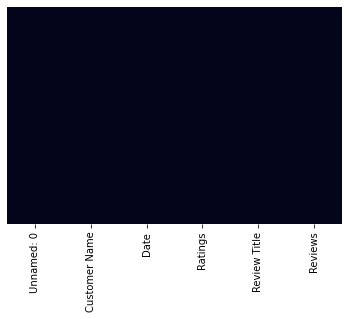

In [ ]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [ ]:
data=data.drop("Unnamed: 0", axis=1)
data.head()

,Customer Name,Date,Ratings,Review Title,Reviews
0,Simmi Dhawan,13 March 2019,1.0 out of 5 stars,Worst experience..new product not working,Product not working..have gifted it on 9th Feb...
1,Amazon Customer,19 September 2020,1.0 out of 5 stars,Damaged product - Does not power on,The packaging seemed old snd sleeady tanoered ...
2,Amazon Customer,13 September 2019,1.0 out of 5 stars,No refund of amount after 10 days,The product doesn't work. I returned it once a...
3,Abhishek,30 August 2020,1.0 out of 5 stars,Brand image,Received a damaged product. The machine doesn'...
4,Sundarrajan P R,16 October 2020,5.0 out of 5 stars,Good but not the Best,Not a best for Veg since optimum utilisation s...


In [ ]:
data.duplicated().sum() 

0

In [ ]:
data=data[["Customer Name","Reviews","Ratings"]]

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Simmi Dhawan,Product not working..have gifted it on 9th Feb...,1.0 out of 5 stars
1,Amazon Customer,The packaging seemed old snd sleeady tanoered ...,1.0 out of 5 stars
2,Amazon Customer,The product doesn't work. I returned it once a...,1.0 out of 5 stars
3,Abhishek,Received a damaged product. The machine doesn'...,1.0 out of 5 stars
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,5.0 out of 5 stars


In [ ]:
data.Ratings=data.Ratings.map({"1.0 out of 5 stars":1,"2.0 out of 5 stars":2,"3.0 out of 5 stars":3,
                               "4.0 out of 5 stars":4,"5.0 out of 5 stars":5})

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Simmi Dhawan,Product not working..have gifted it on 9th Feb...,1
1,Amazon Customer,The packaging seemed old snd sleeady tanoered ...,1
2,Amazon Customer,The product doesn't work. I returned it once a...,1
3,Abhishek,Received a damaged product. The machine doesn'...,1
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,5


(array([67.,  0., 12.,  0.,  0., 15.,  0., 23.,  0., 53.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

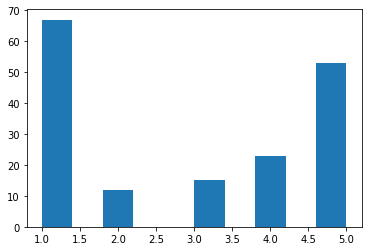

In [ ]:
plt.hist(data.Ratings)

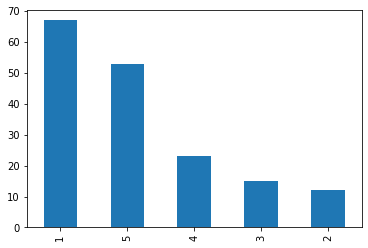

In [ ]:
data["Ratings"].value_counts().plot(kind='bar')

In [ ]:
data_pos=data[data["Ratings"].isin([4,5])]
data_neg=data[data["Ratings"].isin([1,2])]
data_net=data[data["Ratings"].isin([3])]

In [ ]:
data_fil=pd.concat([data_pos,data_neg,data_net])

In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,5
5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,5
8,Manasa,Aloo fries and some regular fries can be done ...,4
9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,4
10,puja,"Value for money, been using this for a week, e...",4


In [ ]:
data_fil.tail()

,Customer Name,Reviews,Ratings
85,tmnivekar,Value for money.. Good product,3
90,Ulhas Deshmukh,Value for money,3
102,Monika,Brush is missing.,3
135,Amazon Customer,Ok product at fair price.... not that effectiv...,3
141,shankar,"The product is good, but the temperature contr...",3


In [ ]:
data_fil.shape

(170, 3)

In [ ]:
data_fil["Sentiment"]=1
data_fil["Sentiment"][data_fil["Ratings"].isin([1,2])]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings,Sentiment
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,5,1
5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,5,1
8,Manasa,Aloo fries and some regular fries can be done ...,4,1
9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,4,1
10,puja,"Value for money, been using this for a week, e...",4,1


In [ ]:
data=data_fil.drop(["Ratings"],axis="columns")

In [ ]:
data.head()

,Customer Name,Reviews,Sentiment
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,1
5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,1
8,Manasa,Aloo fries and some regular fries can be done ...,1
9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,1
10,puja,"Value for money, been using this for a week, e...",1


In [ ]:
data.Sentiment.unique()

array([1, 0])

In [ ]:
#we can find the sentiment of the reviews by the another method that is using TEXTBLOB

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
x=data.iloc[:,0:2]
y=data.iloc[:,1:3]

In [ ]:
y=y.drop(["Reviews"],axis="columns")

In [ ]:
y.head()

,Sentiment
4,1
5,1
8,1
9,1
10,1


In [ ]:
x.shape

(170, 2)

In [ ]:
x.head()

,Customer Name,Reviews
4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...
5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...
8,Manasa,Aloo fries and some regular fries can be done ...
9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...
10,puja,"Value for money, been using this for a week, e..."


In [ ]:
x.reset_index(inplace=True)
y.reset_index(inplace=True)  

In [ ]:
polarity_score=[]

for i in range(0,x.shape[0]):
  score=TextBlob(x.iloc[i][2])
  score1=score.sentiment[0]
  polarity_score.append(score1)

In [ ]:
x=pd.concat([x,pd.Series(polarity_score)],axis=1)

In [ ]:
x.rename(columns={x.columns[3]:"label"},inplace=True)

In [ ]:
x.head()

,index,Customer Name,Reviews,label
0,4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778
1,5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333
2,8,Manasa,Aloo fries and some regular fries can be done ...,0.245833
3,9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250
4,10,puja,"Value for money, been using this for a week, e...",0.108333


In [ ]:
data=pd.concat([x,y],axis="columns")

In [ ]:
data.head()

,index,Customer Name,Reviews,label,index,Sentiment
0,4,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,4,1
1,5,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,5,1
2,8,Manasa,Aloo fries and some regular fries can be done ...,0.245833,8,1
3,9,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,9,1
4,10,puja,"Value for money, been using this for a week, e...",0.108333,10,1


In [ ]:
data=data.drop(["index"],axis=1)

In [ ]:
data.head()

,Customer Name,Reviews,label,Sentiment
0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1
1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1
2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1
3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1
4,puja,"Value for money, been using this for a week, e...",0.108333,1


In [ ]:
data.tail()

,Customer Name,Reviews,label,Sentiment
165,tmnivekar,Value for money.. Good product,0.700000,1
166,Ulhas Deshmukh,Value for money,0.000000,1
167,Monika,Brush is missing.,-0.200000,1
168,Amazon Customer,Ok product at fair price.... not that effectiv...,0.333333,1
169,shankar,"The product is good, but the temperature contr...",0.119643,1


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1
2,2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1
4,4,puja,"Value for money, been using this for a week, e...",0.108333,1


In [ ]:
len(data[data.label>0])

96

In [ ]:
len(data[data.label<0])

46

In [ ]:
data.Sentiment.value_counts()

1    91
0    79
Name: Sentiment, dtype: int64

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1
2,2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1
4,4,puja,"Value for money, been using this for a week, e...",0.108333,1


In [ ]:
data["Sentiment1"]=data['label'].apply(lambda k: 1 if k>=0 else 0)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1,1
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1,1
2,2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1,1
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1,1
4,4,puja,"Value for money, been using this for a week, e...",0.108333,1,1


In [ ]:
data.tail()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
165,165,tmnivekar,Value for money.. Good product,0.700000,1,1
166,166,Ulhas Deshmukh,Value for money,0.000000,1,1
167,167,Monika,Brush is missing.,-0.200000,1,0
168,168,Amazon Customer,Ok product at fair price.... not that effectiv...,0.333333,1,1
169,169,shankar,"The product is good, but the temperature contr...",0.119643,1,1


In [ ]:
data.Sentiment.value_counts()

1    91
0    79
Name: Sentiment, dtype: int64

In [ ]:
data.Sentiment1.value_counts()

1    124
0     46
Name: Sentiment1, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(data.Sentiment,data.Sentiment1)

In [ ]:
cm

array([[42, 37],
       [ 4, 87]])

In [ ]:
data1=data[data["Sentiment"]!=data["Sentiment1"]]

In [ ]:
data1

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
11,11,NITIN BHAVSAR,Not Usefull as expected,-0.100000,1,0
14,14,Amit Jamwal,Quality as expected,-0.100000,1,0
29,29,Khushboo Rani,KFC is failed. Easy to use and restaurant like...,-0.222222,1,0
78,78,Amazon Customer,The product doesn't work. I returned it once a...,0.000000,0,1
79,79,Abhishek,Received a damaged product. The machine doesn'...,0.000000,0,1
80,80,Amazon Customer,"product was defective so returted it, a brand ...",0.136364,0,1
82,82,Amazon Customer,"Originally received defective product, so I ra...",0.122273,0,1
83,83,Vaishali P.,The product only looks good! but DOES NOT WORK,0.437500,0,1
85,85,Ak kk,Not so useful for daily kitchen needs,0.150000,0,1
86,86,Shilpa Gupta,it been 3 months i have purchased this product...,0.333333,0,1


In [ ]:
print("Wrongly classified are:",len(data1))

Wrongly classified are: 41


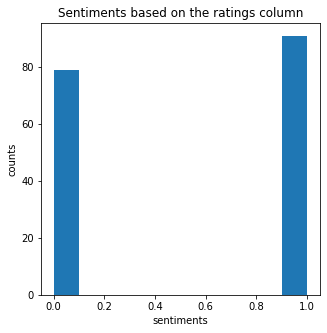

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

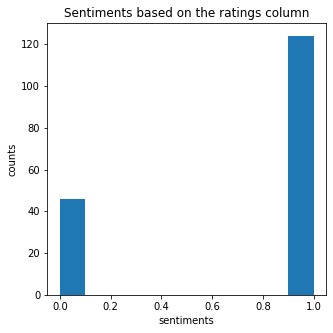

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment1)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

In [ ]:
#to find out the wrongly classified 

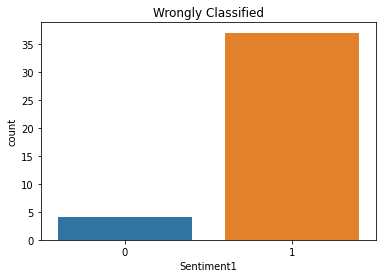

In [ ]:
sns.countplot(data=data1, x= 'Sentiment1')
plt.title("Wrongly Classified");

In [ ]:
#building the wordcloud for the positive,negative and neutral

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1,1
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1,1
2,2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1,1
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1,1
4,4,puja,"Value for money, been using this for a week, e...",0.108333,1,1


In [ ]:
#word cloud on the reviews columns in the dataset

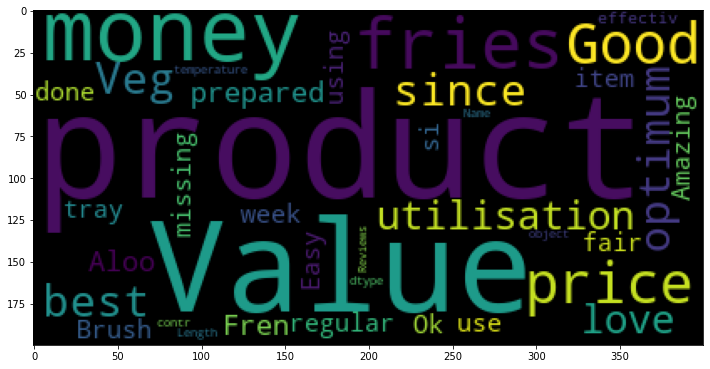

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words("english")).generate(str(data.Reviews))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data_pos=data[data.Sentiment==1]
data_pos.shape

(91, 6)

In [ ]:
data_neg=data[data.Sentiment==0]
data_neg.shape

(79, 6)

In [ ]:
#wordcloud on the postive reviews in the dataset

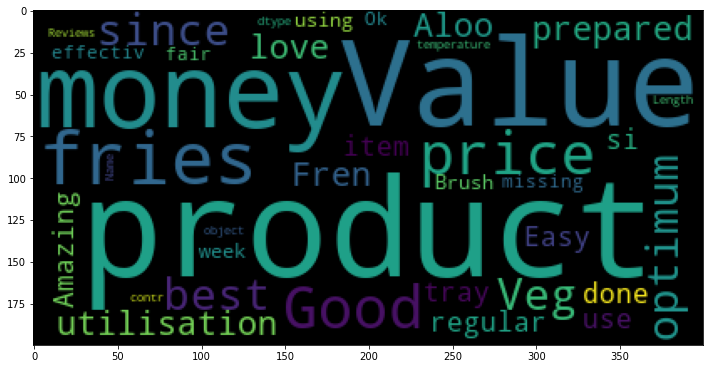

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_pos["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the neutral reviews in the dataset

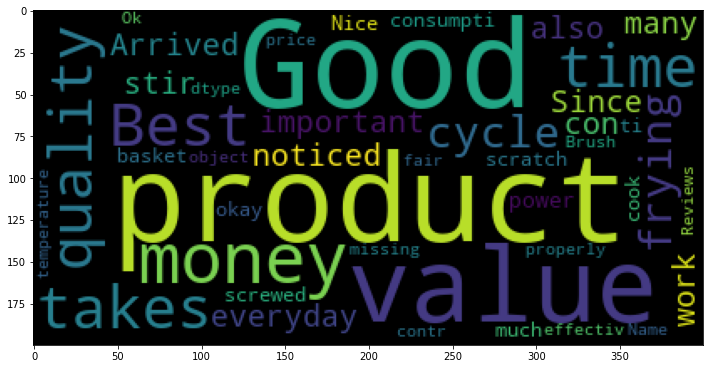

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_net["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the negative reviews in the dataset

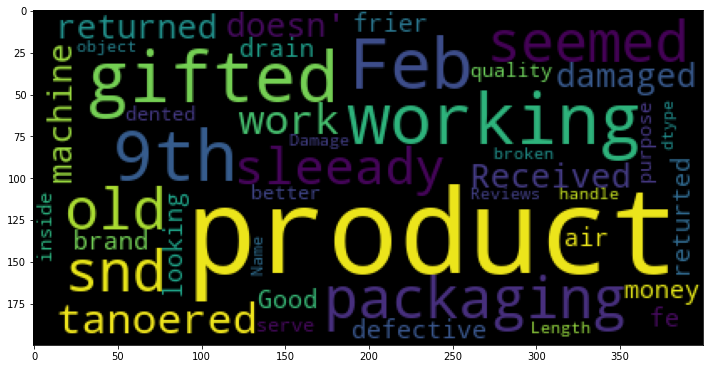

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_neg["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,0.227778,1,1
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,0.433333,1,1
2,2,Manasa,Aloo fries and some regular fries can be done ...,0.245833,1,1
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,0.156250,1,1
4,4,puja,"Value for money, been using this for a week, e...",0.108333,1,1


In [ ]:
#seperate the depended and independed variable
remove=["label","Sentiment","Sentiment1"]
x=data.drop(labels=remove,axis=1)

In [ ]:
remove=["Reviews","label","Sentiment1"]
y=data.drop(labels=remove,axis=1)

In [ ]:
y

,index,Customer Name,Sentiment
0,0,Sundarrajan P R,1
1,1,Nijhum Tripathy,1
2,2,Manasa,1
3,3,Bikramjeet singh,1
4,4,puja,1
...,...,...,...
165,165,tmnivekar,1
166,166,Ulhas Deshmukh,1
167,167,Monika,1
168,168,Amazon Customer,1


In [ ]:
import re                               #regular expression
import nltk                              #Natural Language Toolkit 
from nltk.corpus import stopwords         #the common words in the language
from nltk.stem import WordNetLemmatizer    #converts the similar words into the single word with sence

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lem=WordNetLemmatizer()

In [ ]:
corpus=[]

In [ ]:
#clean data in this
    #we remove stopwords
    #we convert all into lower case
    #we split the sentences into words 
    #by using words it lematise the words
    #after we combine into sentence
    #finally we should append it to corpus

In [ ]:
for i in range(0,len(x)):
  review=re.sub('[^a-zA-Z0-9]',' ',x.Reviews[i])
  review=review.lower()
  review=review.split()
  review=[lem.lemmatize(word)for word in review if word not in set (stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
x.Reviews[1]

'I’m in love with product... I’ve prepared French fries, naan, tikkas, koftas, Manchurian balls, tandoori items and all have turned out great...'

In [ ]:
corpus[1]

'love product prepared french fry naan tikkas koftas manchurian ball tandoori item turned great'

In [ ]:
df=pd.DataFrame(corpus)

In [ ]:
data=pd.concat([x,df],axis=1)

In [ ]:
data.head()

,index,Customer Name,Reviews,0
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...
2,2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...
4,4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...


In [ ]:
data.rename(columns={0:"cleaned Reviews"},inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...
2,2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...
4,4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...


In [ ]:
!pip install texthero

     |████████████████████████████████| 1.5MB 21.4MB/s 
     |████████████████████████████████| 245kB 52.6MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import texthero as hero

In [ ]:
data['tfidf']=(
    data['cleaned Reviews']
    .pipe(hero.clean)
    .pipe(hero.tfidf)       #->remove 'do_'
)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
#appling the clustering to the tfidf

In [ ]:
data['kmeans']=(
    data['tfidf']
    .pipe(hero.kmeans,n_clusters=2)    #->remove 'do_'
    .astype(str)
)

In [ ]:
data.kmeans.unique()

array(['0', '1'], dtype=object)

In [ ]:
#we have to reduce the feature by applying PCA on tfidf feature

In [ ]:
data['pca']=data['tfidf'].pipe(hero.pca)    #->remove 'do_'

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.013121847503156894, -0.02159905105094502]"
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09258563934265014, -0.03542221151535943]"
2,2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.05553742561584805, -0.026478007482015817]"
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.10960519603155382, 0.08585098871063501]"
4,4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.14826431754752706, -0.05123978839615596]"


In [ ]:
hero.scatterplot(data,'pca',color='kmeans',title="reviews grouping")
plt.figure(figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

In [ ]:
#Plot of most used words
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(data['cleaned Reviews'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_

In [ ]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram

,frequency,bigram
0,19,air fryer
1,13,value money
2,12,easy use
3,6,good product
4,5,working properly
...,...,...
1377,1,2016 working
1378,1,2016 contacted
1379,1,15 try
1380,1,14th dec


In [ ]:
df_plot=df_ngram.head(10)
df_plot

,frequency,bigram
0,19,air fryer
1,13,value money
2,12,easy use
3,6,good product
4,5,working properly
5,5,work well
6,5,product working
7,5,nice product
8,4,product good
9,4,great product


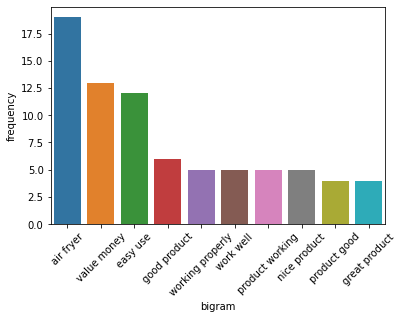

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="bigram", y="frequency", data=df_plot)
plt.xticks(rotation=45)
plt.show()

# Emotion Mining

In [ ]:
!pip install text2emotion

     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 133kB 25.5MB/s 


In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data["Emotion"]=data["cleaned Reviews"].apply(lambda text: te.get_emotion(text))
data["Emotion"]

0      {'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...
1      {'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.33...
2      {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
3      {'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...
4      {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...
                             ...                        
165    {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
166    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
167    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...
168    {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.5,...
169    {'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.0,...
Name: Emotion, Length: 170, dtype: object

In [ ]:
data['Happy']  = data["Emotion"].apply(lambda score_dict: score_dict['Happy'])
data["Happy"]

0      0.22
1      0.67
2      1.00
3      0.33
4      0.33
       ... 
165    1.00
166    0.00
167    0.00
168    0.25
169    0.67
Name: Happy, Length: 170, dtype: float64

In [ ]:
data['Angry']  = data["Emotion"].apply(lambda score_dict: score_dict['Angry'])
data["Angry"]

0      0.11
1      0.00
2      0.00
3      0.33
4      0.00
       ... 
165    0.00
166    0.00
167    0.00
168    0.00
169    0.00
Name: Angry, Length: 170, dtype: float64

In [ ]:
data['Surprise']  = data["Emotion"].apply(lambda score_dict: score_dict['Surprise'])
data["Surprise"]

0      0.11
1      0.33
2      0.00
3      0.33
4      0.00
       ... 
165    0.00
166    0.00
167    0.50
168    0.50
169    0.00
Name: Surprise, Length: 170, dtype: float64

In [ ]:
data['Sad']  = data["Emotion"].apply(lambda score_dict: score_dict['Sad'])
data["Sad"]

0      0.44
1      0.00
2      0.00
3      0.00
4      0.33
       ... 
165    0.00
166    0.00
167    0.50
168    0.25
169    0.00
Name: Sad, Length: 170, dtype: float64

In [ ]:
data['Fear']  = data["Emotion"].apply(lambda score_dict: score_dict['Fear'])
data["Fear"]

0      0.11
1      0.00
2      0.00
3      0.00
4      0.33
       ... 
165    0.00
166    0.00
167    0.00
168    0.00
169    0.33
Name: Fear, Length: 170, dtype: float64

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.013121847503156894, -0.02159905105094502]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.44,0.11
1,1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09258563934265014, -0.03542221151535943]","{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.33...",0.67,0.00,0.33,0.00,0.00
2,2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.05553742561584805, -0.026478007482015817]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00
3,3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.10960519603155382, 0.08585098871063501]","{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00
4,4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.14826431754752706, -0.05123978839615596]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",0.33,0.00,0.00,0.33,0.33


In [ ]:
data=data.drop("index",axis=1)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.013121847503156894, -0.02159905105094502]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.44,0.11
1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09258563934265014, -0.03542221151535943]","{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.33...",0.67,0.00,0.33,0.00,0.00
2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.05553742561584805, -0.026478007482015817]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00
3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.10960519603155382, 0.08585098871063501]","{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00
4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.14826431754752706, -0.05123978839615596]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",0.33,0.00,0.00,0.33,0.33


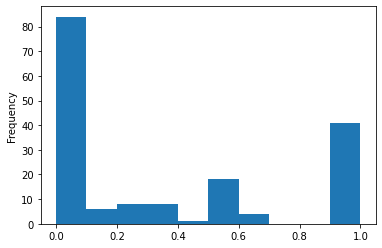

In [ ]:
#Histogram of Happy emotion from the reviews
data["Happy"].plot(kind="hist")

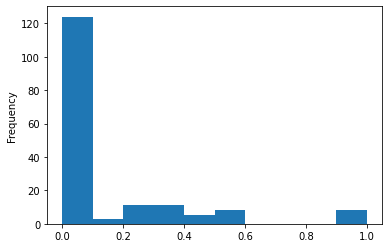

In [ ]:
#Histogram of Sad emotion from the reviews
data["Sad"].plot(kind="hist")

Happy  Angry  Surprise  Sad   Fear
0.22   0.11   0.11      0.44  0.11    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

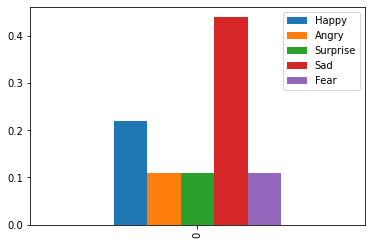

In [ ]:
#Histogram of the first review
data.head(1).groupby(["Happy","Angry","Surprise","Sad","Fear"]).plot(kind="bar")

# Parts Of Speech Tagging

In [ ]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
# Loop to get just the adjectives from each review
words_adj = []
for line in data['Reviews']:  
    doc= nlp(line) 
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ'] 
    words_adj.append(tokens)

In [ ]:
# create a new column with the adjectives
data['words_adj'] = pd.Series(words_adj)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.013121847503156894, -0.02159905105094502]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.44,0.11,"[good, optimum, challenging, high, good, fores..."
1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09258563934265014, -0.03542221151535943]","{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.33...",0.67,0.00,0.33,0.00,0.00,"[french, manchurian, great]"
2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.05553742561584805, -0.026478007482015817]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00,"[regular, less, good, healthy]"
3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.10960519603155382, 0.08585098871063501]","{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00,"[amazing, easy, small, other, fabulous]"
4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.14826431754752706, -0.05123978839615596]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",0.33,0.00,0.00,0.33,0.33,"[easy, easy, other]"


In [ ]:
#MOST COMMON POSITIVE ADJECTIVES
from collections import Counter
positive_adj= data[data['kmeans']=='0']['words_adj']
pos_words= [line for line in positive_adj for line in set(line)]
pos_adj_count= Counter(pos_words).most_common(10)
pos_adj_count

[('good', 16),
 ('easy', 14),
 ('bad', 11),
 ('other', 8),
 ('nice', 7),
 ('defective', 7),
 ('great', 6),
 ('same', 5),
 ('healthy', 5),
 ('awesome', 5)]

In [ ]:
dfp=pd.DataFrame(pos_adj_count)
dfp

,0,1
0,good,16
1,easy,14
2,bad,11
3,other,8
4,nice,7
5,defective,7
6,great,6
7,same,5
8,healthy,5
9,awesome,5


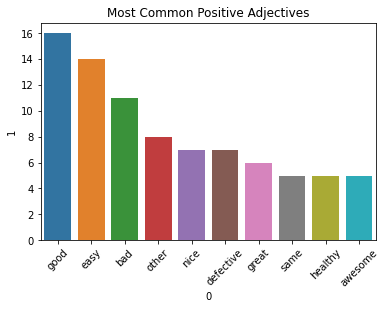

In [ ]:
#Plot to show the positive adjectives
sns.barplot(x=0, y=1, data=dfp)
plt.xticks(rotation=45)
plt.title("Most Common Positive Adjectives");
plt.show()

In [ ]:
#MOST COMMON NEGATIVE ADJECTIVES
import collections
negative_adj= data[data['kmeans']=='1']['words_adj']
neg_words= [line for line in negative_adj for line in set(line)]
neg_adj_count= collections.Counter(neg_words).most_common(10)
neg_adj_count


[('good', 21), ('nice', 2), ('small', 1)]

In [ ]:
dfn=pd.DataFrame(neg_adj_count)
dfn

,0,1
0,good,21
1,nice,2
2,small,1


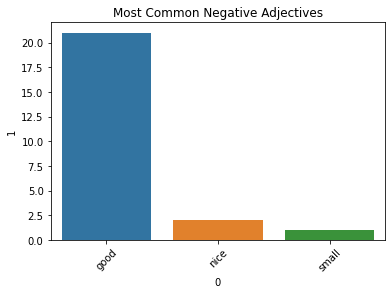

In [ ]:
#Plot to show negative adjectives
sns.barplot(x=0, y=1, data=dfn)
plt.xticks(rotation=45)
plt.title("Most Common Negative Adjectives");
plt.show()

# Named Entity Recognition

In [ ]:
rev=data['Reviews']
rev[0]

'Not a best for Veg since optimum utilisation seems to be quite challenging. Also, power consumption seems to be higher than what expected.Product is good. Will try to have this foreseeable future when lot of alternate dishes are available for the same.'

In [ ]:
import spacy
from spacy import displacy


nlp = spacy.load("en_core_web_sm")
doc = nlp(rev[0])
displacy.render(doc, style="dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="05fb5cc585db4b06bd16f237ecc26d2c-0" class="displacy" width="7575" height="749.5" direction="ltr" style="max-width: none; height: 749.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="659.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Not</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PART</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="659.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">a</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="659.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">best</tspan>\n    <tspan class="displacy-tag" d

In [ ]:
displacy.render(doc, style="ent")

/usr/lib/python3.7/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



'<div class="entities" style="line-height: 2.5; direction: ltr">Not a best for Veg since optimum utilisation seems to be quite challenging. Also, power consumption seems to be higher than what expected.Product is good. Will try to have this foreseeable future when lot of alternate dishes are available for the same.</div>'

In [ ]:
import gensim
from gensim import corpora,models
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Sundarrajan P R,Not a best for Veg since optimum utilisation s...,best veg since optimum utilisation seems quite...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.013121847503156894, -0.02159905105094502]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.44,0.11,"[good, optimum, challenging, high, good, fores..."
1,Nijhum Tripathy,I’m in love with product... I’ve prepared Fren...,love product prepared french fry naan tikkas k...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09258563934265014, -0.03542221151535943]","{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.33...",0.67,0.00,0.33,0.00,0.00,"[french, manchurian, great]"
2,Manasa,Aloo fries and some regular fries can be done ...,aloo fry regular fry done le oil taste good nd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.05553742561584805, -0.026478007482015817]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00,"[regular, less, good, healthy]"
3,Bikramjeet singh,Amazing item at this price.Easy to use.tray si...,amazing item price easy use tray size small 6 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.10960519603155382, 0.08585098871063501]","{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00,"[amazing, easy, small, other, fabulous]"
4,puja,"Value for money, been using this for a week, e...",value money using week everything panner chick...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.14826431754752706, -0.05123978839615596]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",0.33,0.00,0.00,0.33,0.33,"[easy, easy, other]"


In [ ]:
data.columns

Index(['Customer Name', 'Reviews', 'cleaned Reviews', 'tfidf', 'kmeans', 'pca',
       'Emotion', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear', 'words_adj'],
      dtype='object')

In [ ]:
#from the above we need only Reviews column to find the topics of the in the each review column

In [ ]:
remove=["Customer Name","cleaned Reviews","tfidf","kmeans","pca","Emotion","Happy","Angry","Surprise","Sad","Fear","words_adj"]
data1=data.drop(labels=remove,axis="columns")

In [ ]:
data1.head()

,Reviews
0,Not a best for Veg since optimum utilisation s...
1,I’m in love with product... I’ve prepared Fren...
2,Aloo fries and some regular fries can be done ...
3,Amazing item at this price.Easy to use.tray si...
4,"Value for money, been using this for a week, e..."


In [ ]:
#this is the raw data we have to clean the data
#to find the topics in the each topic modelling in reviews 

In [ ]:
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [ ]:
data1["review_clean"]=data1["Reviews"].apply(clean)

In [ ]:
data1.head()

,Reviews,review_clean
0,Not a best for Veg since optimum utilisation s...,"[best, veg, since, optimum, utilisation, seems..."
1,I’m in love with product... I’ve prepared Fren...,"[i’m, love, product, i’ve, prepared, french, f..."
2,Aloo fries and some regular fries can be done ...,"[aloo, fry, regular, fry, done, le, oil, taste..."
3,Amazing item at this price.Easy to use.tray si...,"[amazing, item, priceeasy, usetray, size, smal..."
4,"Value for money, been using this for a week, e...","[value, money, using, week, everything, panner..."


In [ ]:
data1["review_clean"][3]

['amazing',
 'item',
 'priceeasy',
 'usetray',
 'size',
 'small',
 '6’’',
 'fabulous',
 'product']

In [ ]:
#create dictionary
dictionary=corpora.Dictionary(data1["review_clean"])

In [ ]:
len(dictionary)

807

In [ ]:
#total no of non-zeros in the dictionary

In [ ]:
print(dictionary.num_nnz)

1595


In [ ]:
#create term document matrix

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data1['review_clean'] ]
print(len(doc_term_matrix))

170


In [ ]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(10, 1),
  (24, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(26, 1),
  (34, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(43, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(30, 1),
  (43, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1)],
 [(3, 1),
  (41, 1),
  (57, 1),
  (72, 1),
  (78, 1),
  (79, 1),
  (8

In [ ]:
#instantiate LDA model 

In [ ]:
lda=gensim.models.ldamodel.LdaModel

In [ ]:
#fit LDA model on dataset

In [ ]:
num_topics=5
ldamodel=lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

In [ ]:
#print the topics identified by LDA model

In [ ]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.015*"product" + 0.012*"buy" + 0.010*"time" + 0.010*"fry" + 0.010*"better" + 0.010*"expected" + 0.008*"air" + 0.008*"frying" + 0.008*"fryer" + 0.008*"working"'),
 (1,
  '0.037*"value" + 0.035*"money" + 0.011*"good" + 0.011*"easy" + 0.011*"chicken" + 0.007*"cooking" + 0.007*"using" + 0.007*"time" + 0.007*"well" + 0.007*"use"'),
 (2,
  '0.047*"good" + 0.041*"product" + 0.017*"working" + 0.011*"prestige" + 0.011*"service" + 0.011*"return" + 0.009*"work" + 0.008*"even" + 0.008*"time" + 0.008*"also"'),
 (3,
  '0.029*"product" + 0.017*"fryer" + 0.017*"air" + 0.016*"use" + 0.014*"nice" + 0.014*"easy" + 0.012*"oil" + 0.010*"piece" + 0.009*"dish" + 0.008*"made"'),
 (4,
  '0.049*"product" + 0.020*"working" + 0.016*"it" + 0.014*"service" + 0.014*"problem" + 0.011*"great" + 0.010*"buy" + 0.010*"prestige" + 0.010*"item" + 0.008*"broken"')]

In [ ]:
lda_corpus = ldamodel[doc_term_matrix]

In [ ]:
[doc for doc in lda_corpus]

[[(0, 0.008341091),
  (1, 0.008371831),
  (2, 0.9664893),
  (3, 0.008435679),
  (4, 0.008362107)],
 [(0, 0.011925523),
  (1, 0.011851419),
  (2, 0.011829517),
  (3, 0.011812755),
  (4, 0.95258075)],
 [(0, 0.015559205),
  (1, 0.9378373),
  (2, 0.015582814),
  (3, 0.015597329),
  (4, 0.015423346)],
 [(0, 0.020020586),
  (1, 0.020004308),
  (2, 0.020071477),
  (3, 0.020089606),
  (4, 0.919814)],
 [(0, 0.010056968),
  (1, 0.9597231),
  (2, 0.010031511),
  (3, 0.010161238),
  (4, 0.010027159)],
 [(0, 0.020168414),
  (1, 0.020229941),
  (2, 0.918523),
  (3, 0.020884013),
  (4, 0.020194603)],
 [(0, 0.01671925),
  (1, 0.016806914),
  (2, 0.016881978),
  (3, 0.017102448),
  (4, 0.9324894)],
 [(0, 0.88512003),
  (1, 0.028738052),
  (2, 0.028765963),
  (3, 0.028677924),
  (4, 0.028697984)],
 [(0, 0.04042404),
  (1, 0.04011388),
  (2, 0.041150384),
  (3, 0.83683205),
  (4, 0.041479666)],
 [(0, 0.100137345),
  (1, 0.10075095),
  (2, 0.59876525),
  (3, 0.10034565),
  (4, 0.10000078)],
 [(0, 0.022358